In [2]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import seaborn as sns

In [ ]:
directorio= 'C:/Users/NOE/Desktop/TFG-Example/Islet data\Models'



# Diccionario para almacenar los datos de los modelos cargados
modelos = {}

# Loop para cargar cada archivo .mat
for archivo in os.listdir(directorio):
    if archivo.endswith('.mat'):
        # Construir la ruta completa del archivo
        ruta_archivo = os.path.join(directorio, archivo)
        
        # Cargar el archivo .mat
        datos = cobra.io.load_matlab_model(ruta_archivo)
        
        # Guardar el nombre del modelo
        nombre_modelo = os.path.splitext(archivo)[0]  # Eliminar la extensión .mat del nombre del archivo
        
        
        # Almacenar los datos del modelo en el diccionario
        modelos[nombre_modelo] = datos
        
        # Opcional: Imprimir el nombre del modelo cargado
        print("Modelo cargado:", nombre_modelo)

No defined compartments in model ContextModel_IGT. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


In [3]:

resultados = {}

# Loop para optimizar cada modelo cargado
for nombre_modelo, modelo in modelos.items():
    # Llamar a la función optimize() en el modelo actual
    solucion = modelo.optimize()
    # Almacenar el resultado de la optimización en el diccionario
    resultados[nombre_modelo] = solucion
    # Imprimir el resultado de la optimización, si lo deseas
    print("Optimización del modelo", nombre_modelo, "completa. Estado:", modelo.solver.status)

Optimización del modelo IGTModel_GSM5009231_DP005 completa. Estado: optimal
Optimización del modelo IGTModel_GSM5009237_DP013 completa. Estado: optimal
Optimización del modelo IGTModel_GSM5009241_DP025 completa. Estado: optimal
Optimización del modelo IGTModel_GSM5009249_DP048 completa. Estado: optimal
Optimización del modelo IGTModel_GSM5009251_DP051 completa. Estado: optimal
Optimización del modelo NDModel_GSM5009234_DP010 completa. Estado: optimal
Optimización del modelo NDModel_GSM5009236_DP012 completa. Estado: optimal
Optimización del modelo NDModel_GSM5009239_DP019 completa. Estado: optimal
Optimización del modelo NDModel_GSM5009252_DP052 completa. Estado: optimal
Optimización del modelo NDModel_GSM5009254_DP054 completa. Estado: optimal
Optimización del modelo T2DModel_GSM5009230_DP003 completa. Estado: optimal
Optimización del modelo T2DModel_GSM5009243_DP030 completa. Estado: optimal
Optimización del modelo T2DModel_GSM5009247_DP042 completa. Estado: optimal
Optimización del 

In [4]:
biomassas = {}

# Loop para optimizar cada modelo cargado
for nombre_modelo, modelo in modelos.items():
    # Llamar a la función optimize() en el modelo actual
    solucion = modelo.optimize()
    
    # Calcular la biomasa a partir del valor objetivo del resultado de la optimización
    biomasa = solucion.objective_value
    
    # Almacenar la biomasa en el diccionario
    biomassas[nombre_modelo] = biomasa
    
    # Imprimir la biomasa calculada, si lo deseas
    print("Biomasa para el modelo", nombre_modelo, ":", biomasa)

Biomasa para el modelo IGTModel_GSM5009231_DP005 : 159.79646415601175
Biomasa para el modelo IGTModel_GSM5009237_DP013 : 166.4873813571043
Biomasa para el modelo IGTModel_GSM5009241_DP025 : 208.02297840978736
Biomasa para el modelo IGTModel_GSM5009249_DP048 : 123.22746182756855
Biomasa para el modelo IGTModel_GSM5009251_DP051 : 185.45773937401333
Biomasa para el modelo NDModel_GSM5009234_DP010 : 108.16529468681765
Biomasa para el modelo NDModel_GSM5009236_DP012 : 125.95736941871876
Biomasa para el modelo NDModel_GSM5009239_DP019 : 135.3822604497681
Biomasa para el modelo NDModel_GSM5009252_DP052 : 137.67075911624178
Biomasa para el modelo NDModel_GSM5009254_DP054 : 140.45064525092556
Biomasa para el modelo T2DModel_GSM5009230_DP003 : 163.59428421202279
Biomasa para el modelo T2DModel_GSM5009243_DP030 : 128.0360788031595
Biomasa para el modelo T2DModel_GSM5009247_DP042 : 178.26697982448866
Biomasa para el modelo T2DModel_GSM5009250_DP049 : 201.96723845800048
Biomasa para el modelo T2DMo

In [5]:
df_biomassas = pd.DataFrame(list(biomassas.items()), columns=['Modelo', 'Biomasa'])
print(df_biomassas)

                        Modelo     Biomasa
0    IGTModel_GSM5009231_DP005  159.796464
1    IGTModel_GSM5009237_DP013  166.487381
2    IGTModel_GSM5009241_DP025  208.022978
3    IGTModel_GSM5009249_DP048  123.227462
4    IGTModel_GSM5009251_DP051  185.457739
5     NDModel_GSM5009234_DP010  108.165295
6     NDModel_GSM5009236_DP012  125.957369
7     NDModel_GSM5009239_DP019  135.382260
8     NDModel_GSM5009252_DP052  137.670759
9     NDModel_GSM5009254_DP054  140.450645
10   T2DModel_GSM5009230_DP003  163.594284
11   T2DModel_GSM5009243_DP030  128.036079
12   T2DModel_GSM5009247_DP042  178.266980
13   T2DModel_GSM5009250_DP049  201.967238
14   T2DModel_GSM5009255_DP055  128.121776
15  T3cDModel_GSM5009229_DP002  145.272822
16  T3cDModel_GSM5009238_DP017   49.078285
17  T3cDModel_GSM5009242_DP028  145.176659
18  T3cDModel_GSM5009245_DP039  171.690872
19  T3cDModel_GSM5009263_DP066  128.183143


In [6]:
IGT_biomassa = {}
ND_biomassa = {}
T2D_biomassa = {}
T3cD_biomassa = {}

# Loop sobre el DataFrame de biomassas
for index, row in df_biomassas.iterrows():
    nombre_modelo = row['Modelo']
    biomasa = row['Biomasa']
    
    # Determinar el grupo al que pertenece el modelo
    if nombre_modelo.startswith('IGT'):
        IGT_biomassa[nombre_modelo] = biomasa
    elif nombre_modelo.startswith('ND'):
        ND_biomassa[nombre_modelo] = biomasa
    elif nombre_modelo.startswith('T2D'):
        T2D_biomassa[nombre_modelo] = biomasa
    elif nombre_modelo.startswith('T3cD'):
        T3cD_biomassa[nombre_modelo] = biomasa

# Imprimir los nombres de los modelos en cada grupo
print("IGT Models:", list(IGT_biomassa.keys()))
print("ND Models:", list(ND_biomassa.keys()))
print("T2D Models:", list(T2D_biomassa.keys()))
print("T3cD Models:", list(T3cD_biomassa.keys()))

IGT Models: ['IGTModel_GSM5009231_DP005', 'IGTModel_GSM5009237_DP013', 'IGTModel_GSM5009241_DP025', 'IGTModel_GSM5009249_DP048', 'IGTModel_GSM5009251_DP051']
ND Models: ['NDModel_GSM5009234_DP010', 'NDModel_GSM5009236_DP012', 'NDModel_GSM5009239_DP019', 'NDModel_GSM5009252_DP052', 'NDModel_GSM5009254_DP054']
T2D Models: ['T2DModel_GSM5009230_DP003', 'T2DModel_GSM5009243_DP030', 'T2DModel_GSM5009247_DP042', 'T2DModel_GSM5009250_DP049', 'T2DModel_GSM5009255_DP055']
T3cD Models: ['T3cDModel_GSM5009229_DP002', 'T3cDModel_GSM5009238_DP017', 'T3cDModel_GSM5009242_DP028', 'T3cDModel_GSM5009245_DP039', 'T3cDModel_GSM5009263_DP066']


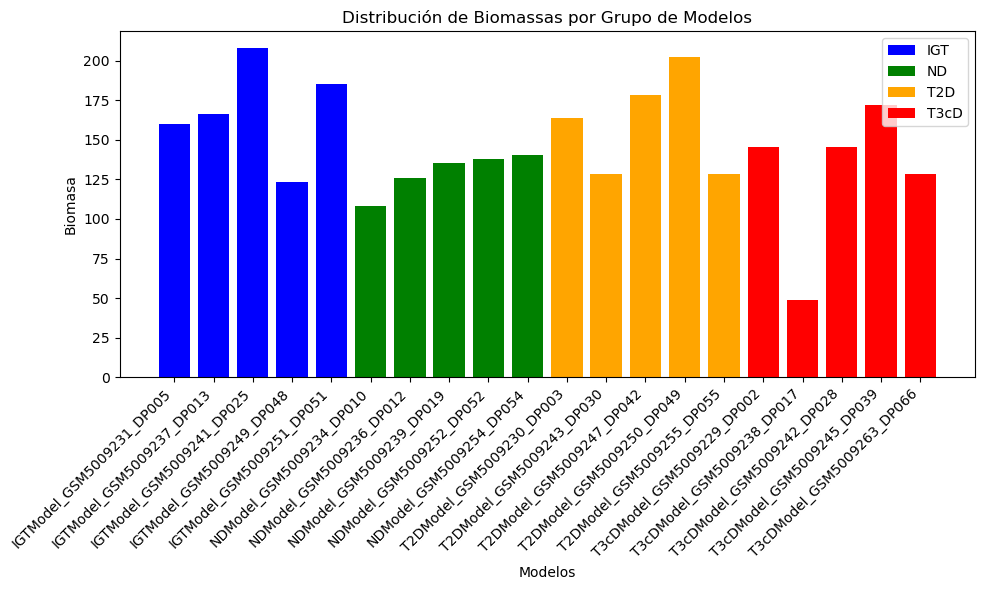

In [7]:
# Definir los grupos de modelos y sus colores correspondientes
grupos = {'IGT': 'blue', 'ND': 'green', 'T2D': 'orange', 'T3cD': 'red'}

# Crear el histograma
plt.figure(figsize=(10, 6))
for grupo, color in grupos.items():
    # Filtrar los modelos por grupo
    modelos_grupo = df_biomassas[df_biomassas['Modelo'].str.startswith(grupo)]
    biomassas_grupo = modelos_grupo['Biomasa']
    # Tratar de rotar las etiquetas x para que sean más legibles
    plt.bar(modelos_grupo['Modelo'], biomassas_grupo, color=color, label=grupo)
plt.xlabel('Modelos')
plt.ylabel('Biomasa')
plt.title('Distribución de Biomassas por Grupo de Modelos')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



In [8]:
IGT_biomassa

{'IGTModel_GSM5009231_DP005': 159.79646415601175,
 'IGTModel_GSM5009237_DP013': 166.4873813571043,
 'IGTModel_GSM5009241_DP025': 208.02297840978736,
 'IGTModel_GSM5009249_DP048': 123.22746182756855,
 'IGTModel_GSM5009251_DP051': 185.45773937401333}

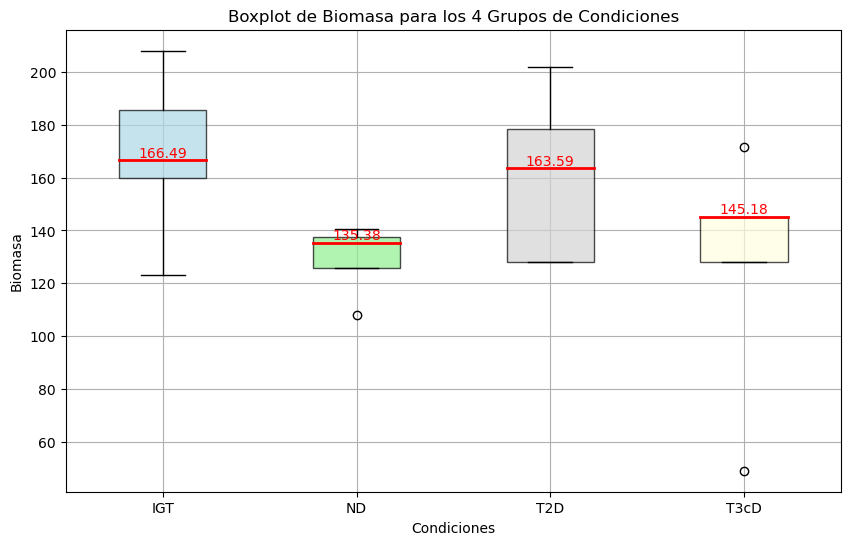

In [9]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
bp = plt.boxplot([list(IGT_biomassa.values()), list(ND_biomassa.values()), list(T2D_biomassa.values()), list(T3cD_biomassa.values())], labels=['IGT', 'ND', 'T2D', 'T3cD'], patch_artist=True)
colors = ['lightblue', 'lightgreen', 'lightgrey', 'lightyellow']

# Dar color a las cajas
for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.7)

# Dar color a las rallas de mediana
for median in bp['medians']:
    median.set(color='red', linewidth=2)

# Poner el valor de las medianas
for i, median in enumerate(bp['medians']):
    plt.text(i + 1, median.get_ydata()[0], f'{median.get_ydata()[0]:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='red')

plt.title('Boxplot de Biomasa para los 4 Grupos de Condiciones')
plt.xlabel('Condiciones')
plt.ylabel('Biomasa')
plt.grid(True)
plt.show()





In [10]:
from scipy.stats import f_oneway

# Calcular el estadístico F y el valor p
f_statistic, p_value = f_oneway(list(IGT_biomassa.values()), list(ND_biomassa.values()), list(T2D_biomassa.values()), list(T3cD_biomassa.values()))

# Imprimir los resultados
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


Estadístico F: 1.9840431630966133
Valor p: 0.15702322928220325
No hay diferencias significativas entre los grupos.


In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combinar todas las listas de biomasa en una sola lista
all_biomass = list(IGT_biomassa.values()) + list(ND_biomassa.values()) + list(T2D_biomassa.values()) + list(T3cD_biomassa.values())

# Etiquetas de grupo para cada valor de biomasa
group_labels = ['IGT'] * len(list(IGT_biomassa.values())) + ['ND'] * len(list(ND_biomassa.values())) + ['T2D'] * len(list(T2D_biomassa.values())) + ['T3cD'] * len(list(T3cD_biomassa.values()))

# Realizar el análisis de Tukey
tukey_results = pairwise_tukeyhsd(all_biomass, group_labels)

# Mostrar los resultados
print(tukey_results)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   IGT     ND -39.0731 0.2809  -98.9919 20.8456  False
   IGT    T2D  -8.6011 0.9758  -68.5199 51.3176  False
   IGT   T3cD  -40.718 0.2495 -100.6368 19.2007  False
    ND    T2D   30.472 0.4856  -29.4468 90.3908  False
    ND   T3cD  -1.6449 0.9998  -61.5637 58.2739  False
   T2D   T3cD -32.1169 0.4418  -92.0357 27.8019  False
------------------------------------------------------


In [12]:
from scipy.stats import f_oneway

# Realizar la prueba de ANOVA para cada par de grupos
f_statistic_IGT_ND, p_value_IGT_ND = f_oneway(list(IGT_biomassa.values()), list(ND_biomassa.values()))
f_statistic_IGT_T2D, p_value_IGT_T2D = f_oneway(list(IGT_biomassa.values()), list(T2D_biomassa.values()))
f_statistic_IGT_T3cD, p_value_IGT_T3cD = f_oneway(list(IGT_biomassa.values()), list(T3cD_biomassa.values()))

f_statistic_ND_T2D, p_value_ND_T2D = f_oneway(list(ND_biomassa.values()), list(T2D_biomassa.values()))
f_statistic_ND_T3cD, p_value_ND_T3cD = f_oneway(list(ND_biomassa.values()), list(T3cD_biomassa.values()))

f_statistic_T2D_T3cD, p_value_T2D_T3cD = f_oneway(list(T2D_biomassa.values()), list(T3cD_biomassa.values()))

# Número total de comparaciones
num_comparisons = 4

# Aplicar corrección de Bonferroni
alpha = 0.05
p_value_IGT_ND_corrected = p_value_IGT_ND * num_comparisons  # Número total de comparaciones
p_value_IGT_T2D_corrected = p_value_IGT_T2D * num_comparisons
p_value_IGT_T3cD_corrected = p_value_IGT_T3cD * num_comparisons
p_value_ND_T2D_corrected = p_value_ND_T2D * num_comparisons
p_value_ND_T3cD_corrected = p_value_ND_T3cD * num_comparisons
p_value_T2D_T3cD_corrected = p_value_T2D_T3cD * num_comparisons


# Imprimir los resultados ajustados
print("IGT vs ND - p-valor corregido:", p_value_IGT_ND_corrected)
print("IGT vs T2D - p-valor corregido:", p_value_IGT_T2D_corrected)
print("IGT vs T3cD - p-valor corregido:", p_value_IGT_T3cD_corrected)
print("ND vs T2D - p-valor corregido:", p_value_ND_T2D_corrected)
print("ND vs T3cD - p-valor corregido:", p_value_ND_T3cD_corrected)
print("T2D vs T3cD - p-valor corregido:", p_value_T2D_T3cD_corrected)


IGT vs ND - p-valor corregido: 0.13509631171824368
IGT vs T2D - p-valor corregido: 2.72327574244193
IGT vs T3cD - p-valor corregido: 0.5797056791170693
ND vs T2D - p-valor corregido: 0.34269789149042645
ND vs T3cD - p-valor corregido: 3.7657767418468326
T2D vs T3cD - p-valor corregido: 0.9648756655958242


# Creacuió data frame

In [15]:
resultados['IGTModel_GSM5009231_DP005']

,fluxes,reduced_costs
13DAMPPOX,0.000000,0.000000e+00
2HBO,0.000000,0.000000e+00
2HCO3_NAt,-500.000000,-0.000000e+00
2OXOADOXm,0.000000,3.469447e-18
2OXOADPTm,0.000000,-0.000000e+00
...,...,...
sink_tyr_L[c],-25.514701,-0.000000e+00
sink_4abut[l],0.000000,0.000000e+00
DM_4glu56dihdind[c],0.000000,0.000000e+00
DM_4abut[c],413.450365,0.000000e+00


In [6]:
fluxes_df = pd.DataFrame(index=[nombre_modelo for nombre_modelo in modelos])

for i, (nombre_modelo, solucion) in enumerate(resultados.items(), start=0):
    fluxes = solucion.fluxes
    
    for reaccion, flujo in fluxes.items():
        if reaccion not in fluxes_df.columns:
            fluxes_df[reaccion] = 0.0
        
        fluxes_df.at[nombre_modelo, reaccion] = flujo

fluxes_df.head()


C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fluxes_df[reaccion] = 0.0
C:\Users\NOE\AppData\Local\Temp\ipykernel_13456\3764325649.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

,13DAMPPOX,2HBO,2HCO3_NAt,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPHEt,34DHPLACOX_NADP_,...,FUT11g,GGH_10FTHF5GLUe,LGNCt,r2082,r2338,ARACHFATPc,DHBPTt,EX_dhbpt[e],EX_ppa[e],HMR_0343
IGTModel_GSM5009231_DP005,0.0,0.0,-500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009237_DP013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009241_DP025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009249_DP048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009251_DP051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
fluxes_df

,13DAMPPOX,2HBO,2HCO3_NAt,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,34DHPHEt,34DHPLACOX_NADP_,...,FUT11g,GGH_10FTHF5GLUe,LGNCt,r2082,r2338,ARACHFATPc,DHBPTt,EX_dhbpt[e],EX_ppa[e],HMR_0343
IGTModel_GSM5009231_DP005,0.0,0.0,-500.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009237_DP013,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009241_DP025,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009249_DP048,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IGTModel_GSM5009251_DP051,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDModel_GSM5009234_DP010,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDModel_GSM5009236_DP012,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDModel_GSM5009239_DP019,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDModel_GSM5009252_DP052,0.0,0.0,0.000000,0.0,0.0,1.975366e+01,1.975366e+01,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDModel_GSM5009254_DP054,0.0,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
